I don't see a good way to directly access the particles associated with LJs, so I'll use this notebook to study potential LJ constituents and look into whether I can unambiguously pick out the relevant particles with dR requirements.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
#plotting
import matplotlib.pyplot as plt
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/studies/../../analysis/tools/sidm_processor.py'>

Start by looking at default 2mu2e sample with 2mu2e selection and matched dark photons.

In [2]:
fileset = {
    "2Mu2E_100GeV_1p2GeV_9p6mm": [
        "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root",
    ],
}

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
hists = output["out"]["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]

Output()

Output()

First add basic pf e, pf mu, pf photon, and dsa mu hists

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff4a115cd60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

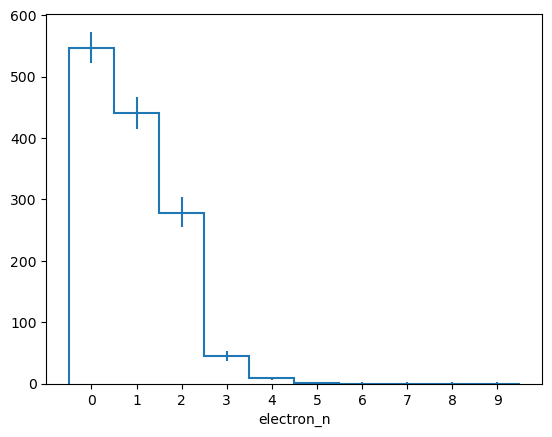

In [4]:
hists["electron_n"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48bd02a90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

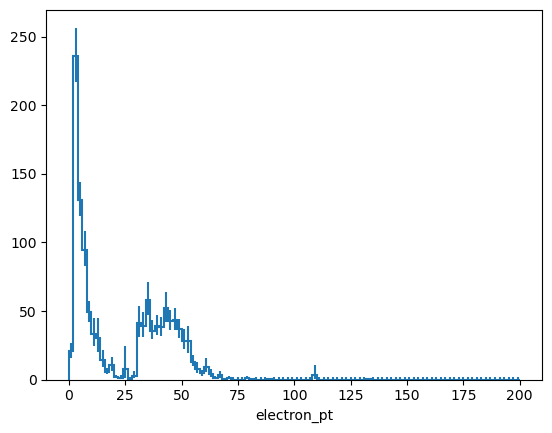

In [5]:
hists["electron_pt"]["2mu2e_matchedLj", :].plot1d()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff48bc1dd90>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48bc303d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48bbd7250>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

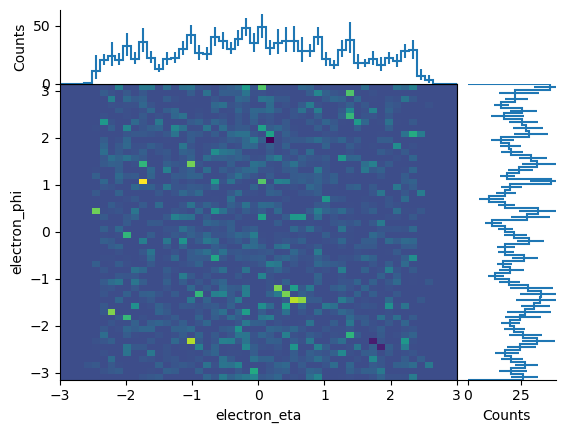

In [6]:
hists["electron_eta_phi"]["2mu2e_matchedLj", :, :].plot2d_full()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48baf4be0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

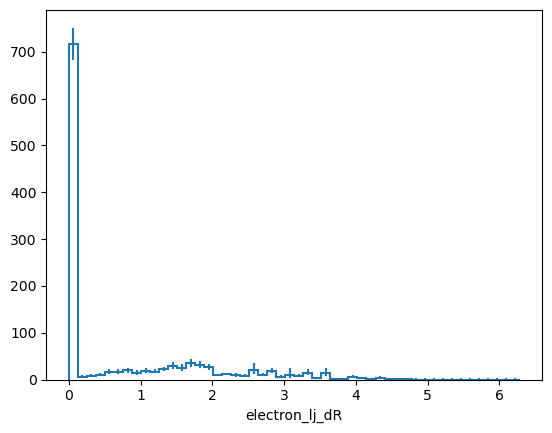

In [7]:
hists["electron_lj_dR"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff4a145b4c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

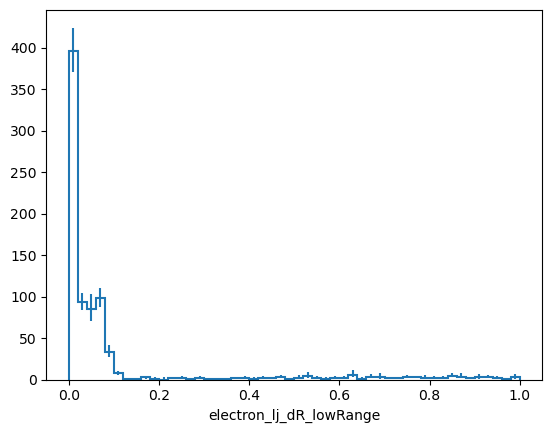

In [8]:
hists["electron_lj_dR_lowRange"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48ba45f10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

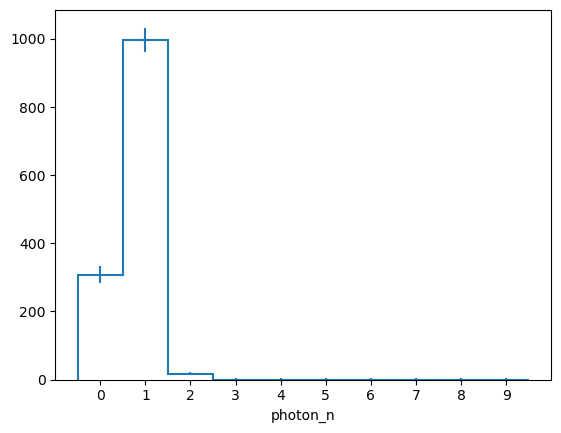

In [9]:
hists["photon_n"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b9cee20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

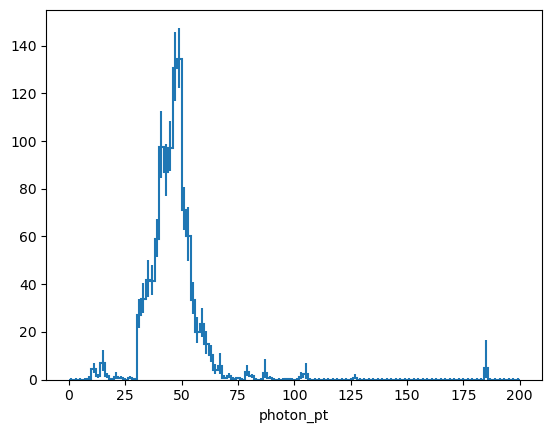

In [10]:
hists["photon_pt"]["2mu2e_matchedLj", :].plot1d()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff48b8ee7c0>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b8eee20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b899c70>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

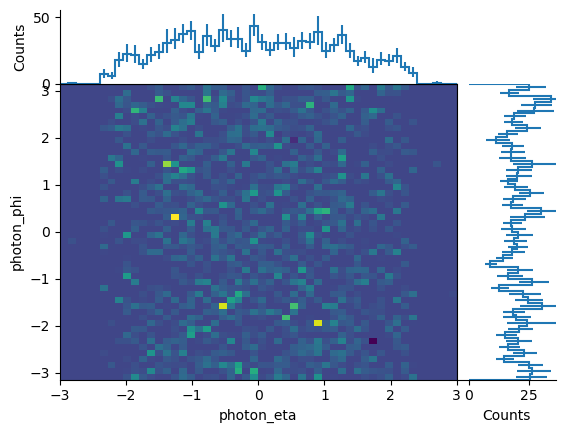

In [11]:
hists["photon_eta_phi"]["2mu2e_matchedLj", :, :].plot2d_full()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b826400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

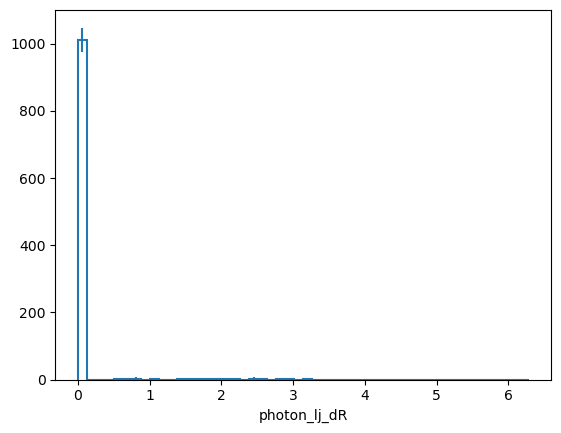

In [12]:
hists["photon_lj_dR"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b739310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

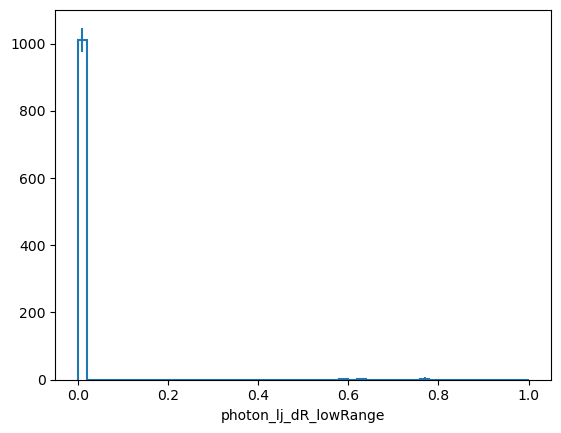

In [13]:
hists["photon_lj_dR_lowRange"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b729970>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

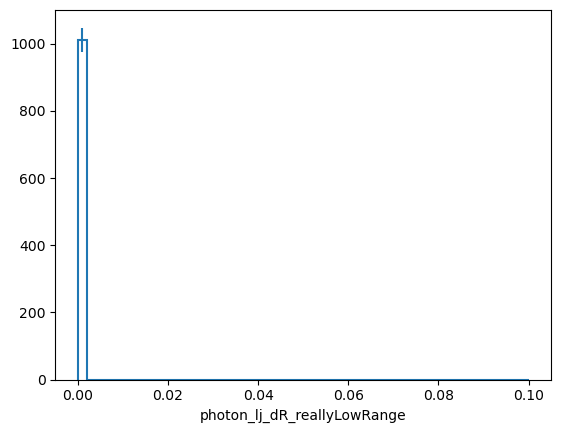

In [14]:
hists["photon_lj_dR_reallyLowRange"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b635310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

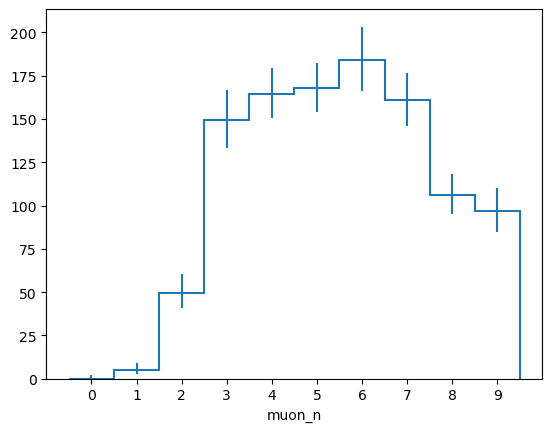

In [15]:
hists["muon_n"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b5c5670>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

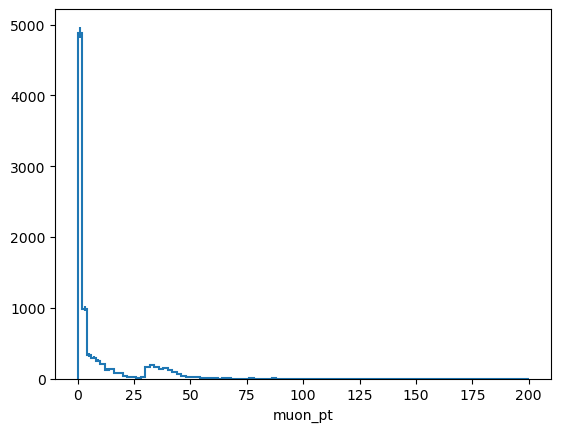

In [16]:
hists["muon_pt"]["2mu2e_matchedLj", :].plot1d()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff48b4da550>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b4dab50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b4ee9a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

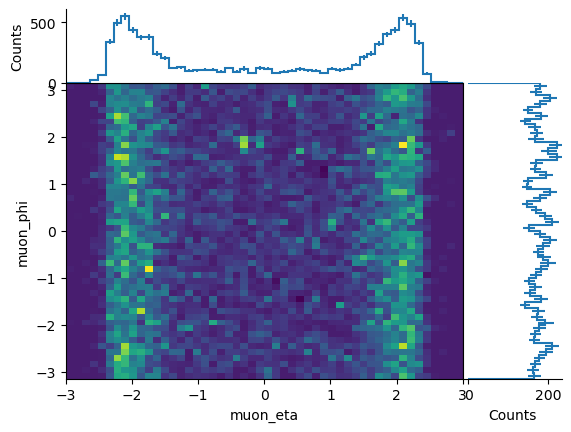

In [17]:
hists["muon_eta_phi"]["2mu2e_matchedLj", :, :].plot2d_full()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b411fd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

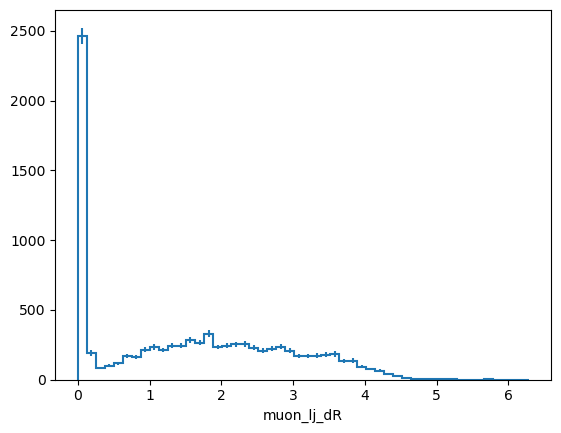

In [18]:
hists["muon_lj_dR"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b437df0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

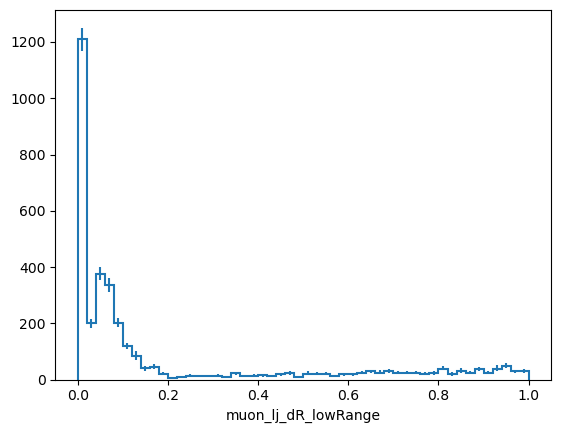

In [19]:
hists["muon_lj_dR_lowRange"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b312e20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

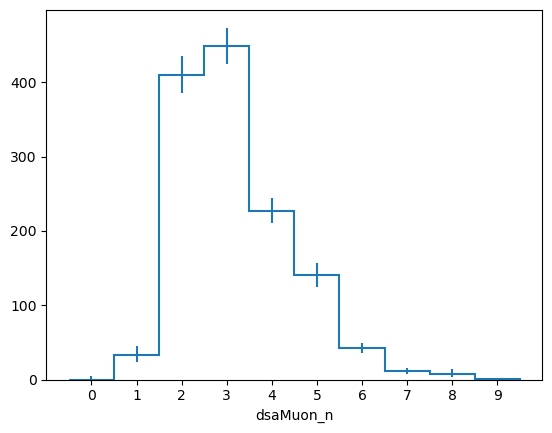

In [20]:
hists["dsaMuon_n"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b2906a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

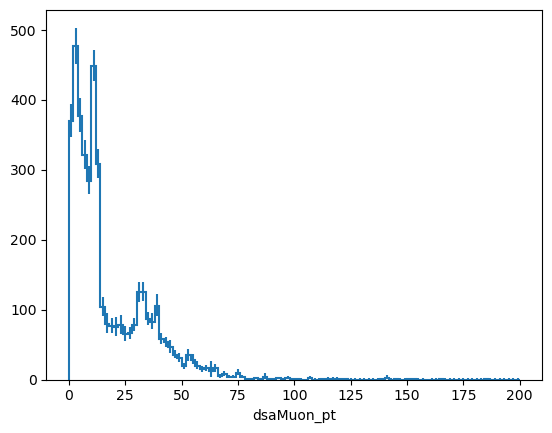

In [21]:
hists["dsaMuon_pt"]["2mu2e_matchedLj", :].plot1d()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff48b1b2220>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b1b2940>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b15e670>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

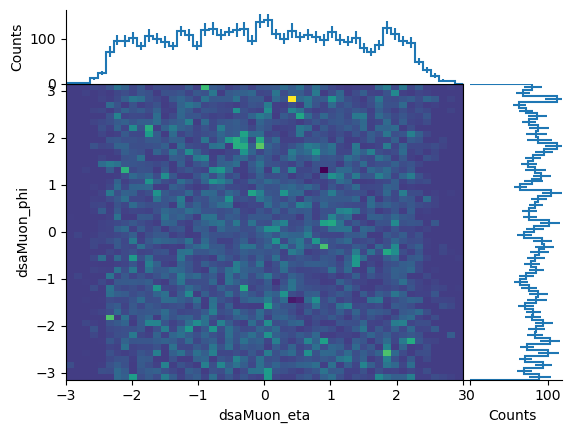

In [22]:
hists["dsaMuon_eta_phi"]["2mu2e_matchedLj", :, :].plot2d_full()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48b0cb040>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

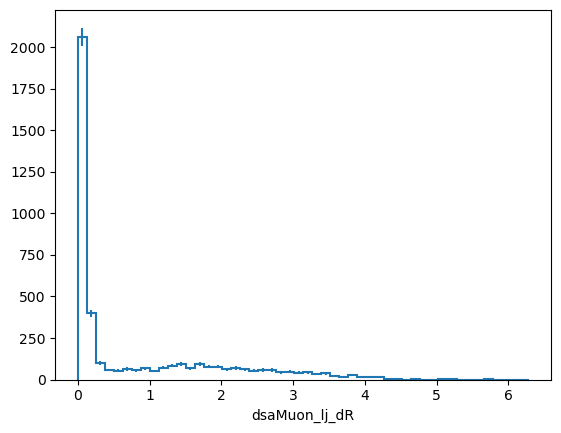

In [23]:
hists["dsaMuon_lj_dR"]["2mu2e_matchedLj", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff48aff6310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

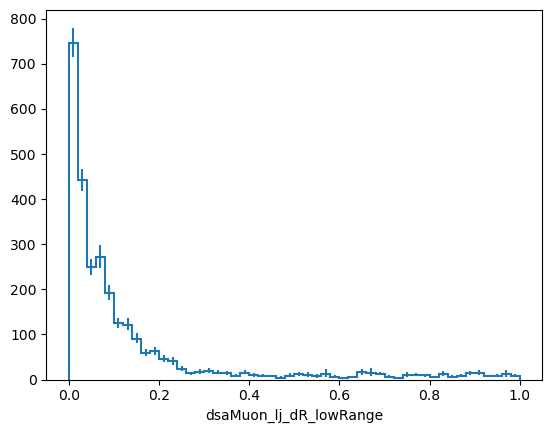

In [24]:
hists["dsaMuon_lj_dR_lowRange"]["2mu2e_matchedLj", :].plot1d()

The photon hists in particular are interesting in that photon pT tends to ~= dark photon pT and dR(photon, LJ) tends to be exactly 0. I guess it makes sense that the majority of LJs whose constituents include photons are just a single reco photon from the dark photon decaying to two nearby electrons in ECAL. We've seen in the lj_resolution notebook that photon LJs appear to have much better pT resolution -- perhaps this is the cause.

Next, I would be interested in looking at the following:
- these same distributions after filtering the collections with pT, id, eta, and dR(LJ) criteria to only include potential LJ constituents
- which particles LJs tend to be composed of (is it more or less always 2 mu, 2 e, or 1 photon, or are more complicated combinations possible/frequent?)
- can I successfully match the reco e, mu, and photons with the gen dark photon daughters?
- do LJs sometimes miss some of the gen dark photon daughters?